## PACOTES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from yellowbrick.features import FeatureImportances
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

## DADOS

In [2]:
#https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
housing = fetch_california_housing()

## TRANSFORMANDO EM UM DF

In [3]:
df = pd.DataFrame(data= housing['data'], columns = housing['feature_names'])
df['PRECO'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRECO
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## RESUMO DESCRITIVO INICIAL

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRECO       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.isnull().mean()

MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
PRECO         0.0
dtype: float64

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRECO
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


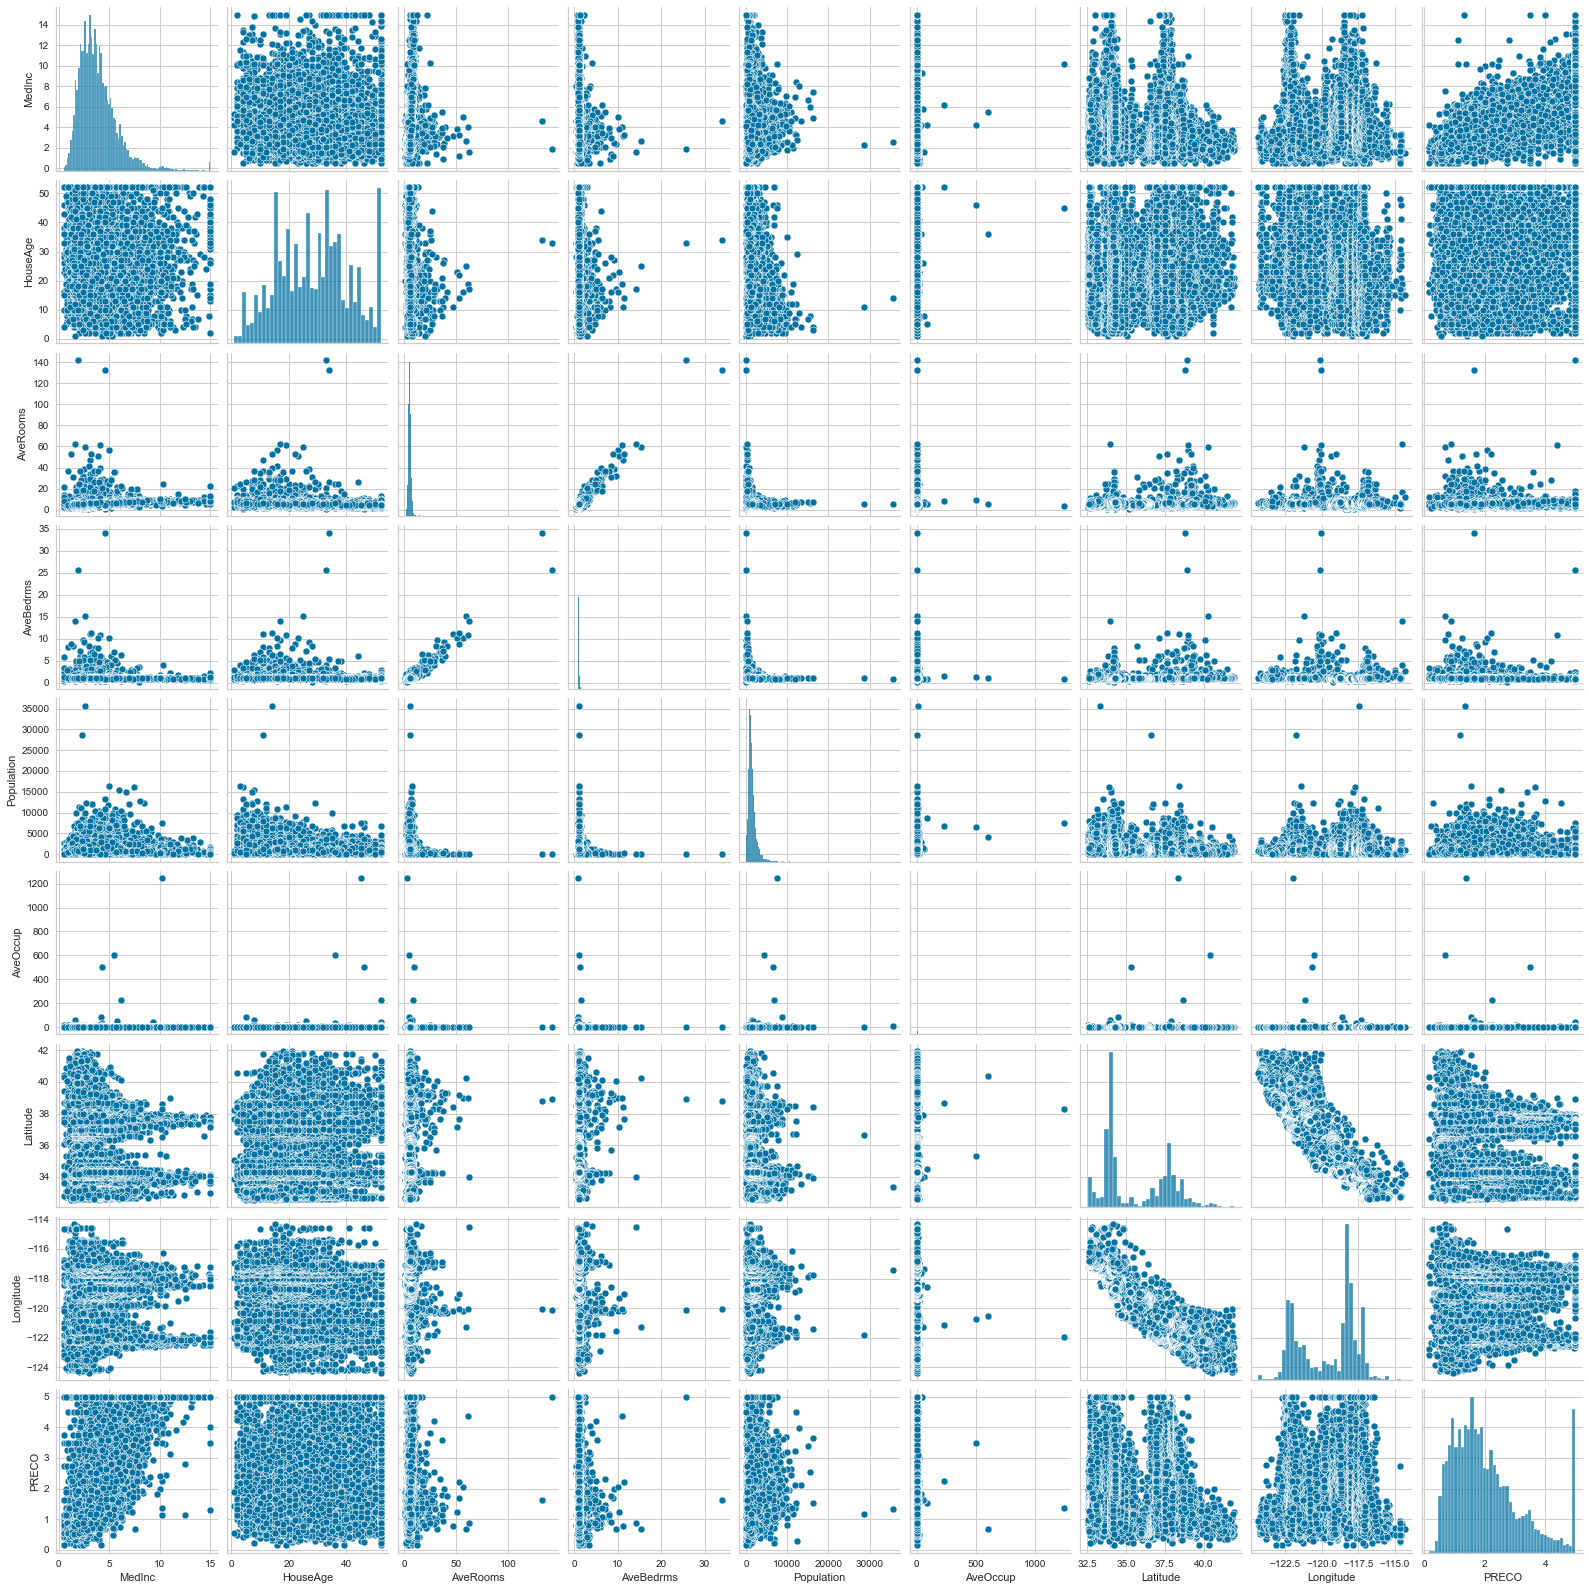

In [7]:
sns.set_style('whitegrid')
sns.pairplot(df)

## MODELO 1

In [8]:
X = df.drop(columns = 'PRECO')
y = df['PRECO']
X.shape, y.shape

((20640, 8), (20640,))

In [9]:
lr = LinearRegression()
lr.fit(X,y)
lr

LinearRegression()

In [10]:
lr.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [11]:
lr.intercept_

-36.941920207184445

In [12]:
predicoes_m1 = lr.predict(X)
predicoes_m1

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

In [13]:
df_resultado = df.copy()
df_resultado['predicao_m1'] = predicoes_m1
df_resultado.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRECO,predicao_m1
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.131650
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.976606
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.676571
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.241598
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.413587
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,2.675277
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,2.395394
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,2.246688
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,1.791627
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,2.428328


## Métricas de avaliação

In [14]:
mse_m1 = mean_squared_error(df_resultado['PRECO'], df_resultado['predicao_m1'])

In [15]:
np.sqrt(mse_m1)

0.7241001216576387

In [16]:
r2_score(df_resultado['PRECO'], df_resultado['predicao_m1'])

0.606232685199805

## Gerando confiabilidade nos resultados

## Modelo 2:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)
X_train.shape,y_train.shape,  X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [18]:
lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

LinearRegression()

In [19]:
predicoes_m2 = lr_2.predict(X_test)

In [20]:
dados_teste = pd.DataFrame()
dados_teste['real'] = y_test
dados_teste['previsao_m2'] = predicoes_m2
dados_teste

,real,previsao_m2
20046,0.47700,0.719123
3024,0.45800,1.764017
15663,5.00001,2.709659
20484,2.18600,2.838926
9814,2.78000,2.604657
...,...,...
15362,2.63300,1.991746
16623,2.66800,2.249839
18086,5.00001,4.468770
2144,0.72300,1.187511


In [21]:
mse_m2 = mean_squared_error(dados_teste['real'], dados_teste['previsao_m2'])
mse_m2

0.5558915986952441

In [22]:
r2_score(dados_teste['real'], dados_teste['previsao_m2'])

0.575787706032451

## COMO MELHORAR O MODELO?
* todas as variáveis são importantes?
* normalização ou padronização dos dados
* variáveis correlacionadas

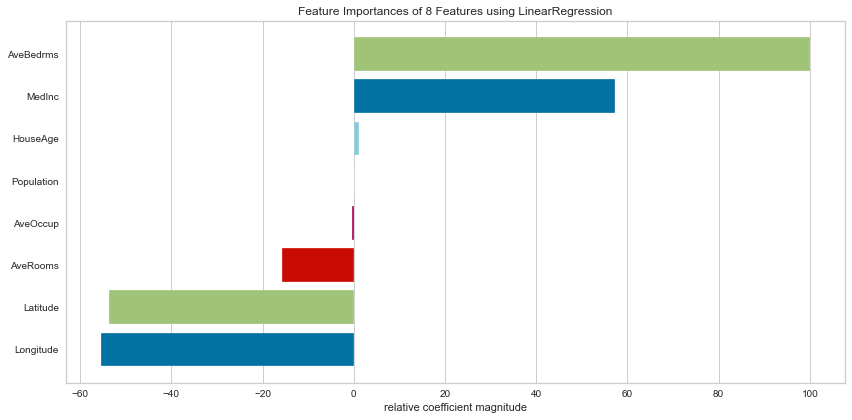

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [23]:
fig, ax = plt.subplots(figsize = (12,6))
fi_viz = FeatureImportances(lr_2, labels=X_train.columns)
fi_viz.fit(X_train, y_train)
fi_viz.poof()

## MODELO 3:

## MODELO 4:

## MODELO 5: RANDOM FOREST